In [1]:
# load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load data
df=pd.read_csv(r"E:\Gunna\new_retail_data.csv")

In [ ]:
#Data Exploration
print(df.info())
print(df.head())

In [39]:
#fill missing values
print(df.isnull().sum())
    

Transaction_ID      0
Customer_ID         0
Name                0
Email               0
Phone               0
Address             0
City                0
State               0
Zipcode             0
Country             0
Age                 0
Gender              0
Income              0
Customer_Segment    0
Date                0
Year                0
Month               0
Time                0
Total_Purchases     0
Amount              0
Total_Amount        0
Product_Category    0
Product_Brand       0
Product_Type        0
Feedback            0
Shipping_Method     0
Payment_Method      0
Order_Status        0
Ratings             0
products            0
dtype: int64


In [40]:
#Basic Statiscal Summary
print(df.describe())

       Transaction_ID    Customer_ID         Phone        Zipcode  \
count    2.939110e+05  293911.000000  2.939110e+05  293911.000000   
mean     5.493726e+06   55013.400523  5.500607e+09   50288.383830   
min      1.000007e+06   10000.000000  1.000049e+09     501.000000   
25%      3.245886e+06   32470.000000  3.253497e+09   25408.000000   
50%      5.495879e+06   55027.000000  5.504466e+09   50586.000000   
75%      7.738197e+06   77514.000000  7.749761e+09   75252.000000   
max      9.999995e+06   99999.000000  9.999996e+09   99949.000000   
std      2.596086e+06   26009.435811  2.596111e+09   28976.614021   

                 Age                           Date           Year  \
count  293911.000000                         293911  293911.000000   
mean       35.465767  2023-08-30 16:41:37.637720320    2023.165125   
min        18.000000            2023-03-01 00:00:00    2023.000000   
25%        22.000000            2023-05-31 00:00:00    2023.000000   
50%        32.000000        

In [41]:
#Data Cleaning
#drop missing values
df.dropna(subset=["Transaction_ID","Customer_ID","Name", "Email", "Phone","Address","City", "State", "Zipcode","Country","Age","Gender","Income","Customer_Segment","Date","Year","Month","Time","Total_Purchases","Amount","Total_Amount"	,"Product_Category","Product_Brand","Feedback","Shipping_Method","Payment_Method","Order_Status","Ratings"],inplace = True)               


In [38]:
print(df.isnull().sum())

Transaction_ID      0
Customer_ID         0
Name                0
Email               0
Phone               0
Address             0
City                0
State               0
Zipcode             0
Country             0
Age                 0
Gender              0
Income              0
Customer_Segment    0
Date                0
Year                0
Month               0
Time                0
Total_Purchases     0
Amount              0
Total_Amount        0
Product_Category    0
Product_Brand       0
Product_Type        0
Feedback            0
Shipping_Method     0
Payment_Method      0
Order_Status        0
Ratings             0
products            0
dtype: int64


In [37]:
#fixing data types
df['Date']=pd.to_datetime(df['Date'])

In [36]:
#convert amt to numeric
df['Amount']=pd.to_numeric(df['Amount'])

In [35]:
#convert data types
df=df.astype({col: 'int' for col in df.select_dtypes('float').columns})

In [34]:
#statistical summary 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 293911 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Transaction_ID    293911 non-null  int64         
 1   Customer_ID       293911 non-null  int64         
 2   Name              293911 non-null  object        
 3   Email             293911 non-null  object        
 4   Phone             293911 non-null  int64         
 5   Address           293911 non-null  object        
 6   City              293911 non-null  object        
 7   State             293911 non-null  object        
 8   Zipcode           293911 non-null  int64         
 9   Country           293911 non-null  object        
 10  Age               293911 non-null  int64         
 11  Gender            293911 non-null  object        
 12  Income            293911 non-null  object        
 13  Customer_Segment  293911 non-null  object        
 14  Date     

In [45]:
#extracted time based features
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.day
df['weekday']=df['Date'].dt.weekday
df['hour']=pd.to_datetime(df['Time'],format='%H:%M:%S').dt.hour

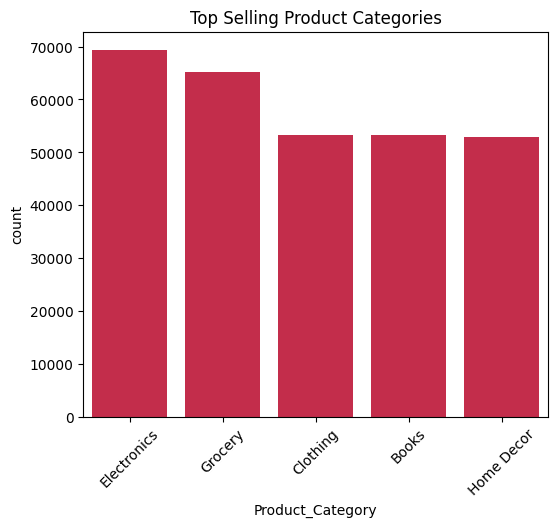

In [46]:
#Exploratory Data Analysis
#top selling product categories
plt.figure(figsize=(6,5))
sns.countplot(data=df, x='Product_Category',order=df['Product_Category'].value_counts().index,color='Crimson')
plt.xticks(rotation=45)
plt.title("Top Selling Product Categories")
plt.show()

In [34]:
#statistical summary 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 293911 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Transaction_ID    293911 non-null  int64         
 1   Customer_ID       293911 non-null  int64         
 2   Name              293911 non-null  object        
 3   Email             293911 non-null  object        
 4   Phone             293911 non-null  int64         
 5   Address           293911 non-null  object        
 6   City              293911 non-null  object        
 7   State             293911 non-null  object        
 8   Zipcode           293911 non-null  int64         
 9   Country           293911 non-null  object        
 10  Age               293911 non-null  int64         
 11  Gender            293911 non-null  object        
 12  Income            293911 non-null  object        
 13  Customer_Segment  293911 non-null  object        
 14  Date     

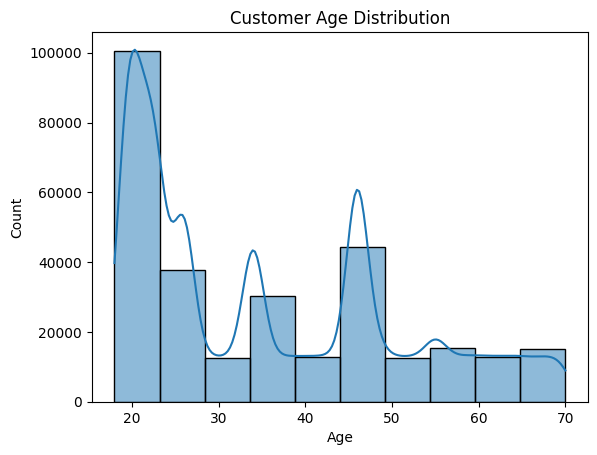

In [22]:
#Customer distribution by age group
plt.figure(figure=(8,4))
sns.histplot(df['Age'],bins=10, kde=True)
plt.title("Customer Age Distribution")
plt.show()

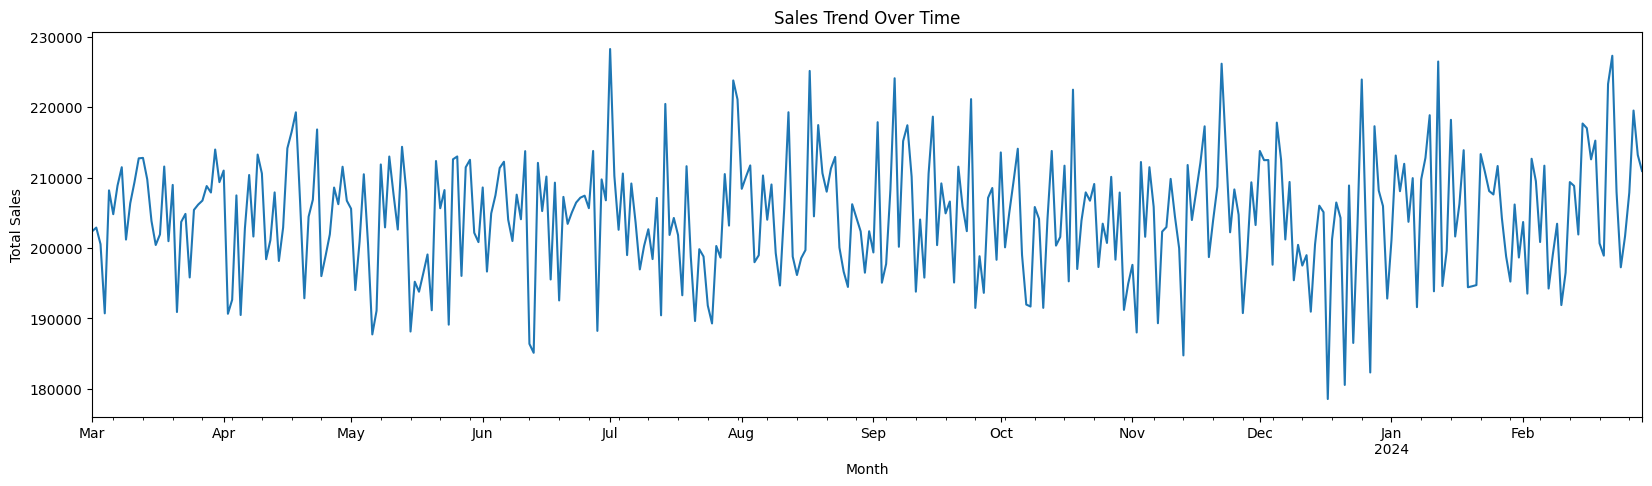

In [24]:
#sales trend over time
df.groupby('Date')['Amount'].sum().plot(figsize=(20,5))
plt.title("Sales Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

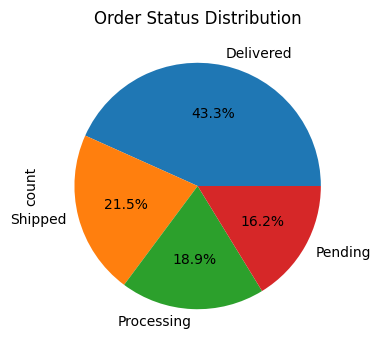

In [20]:
# Order status breakdown
plt.figure(figsize=(6,4))
df['Order_Status'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Order Status Distribution")
plt.show()

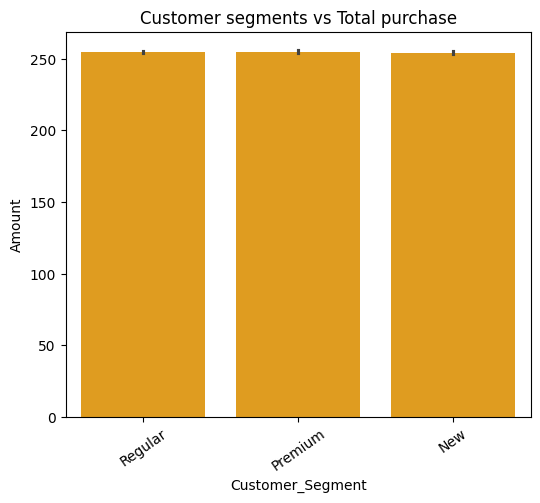

In [33]:
#Customer segmentation
# grouping customer by purchase behaviour
plt.figure(figsize=(6,5))
customer_segments=df.groupby('Customer_Segment')['Amount'].sum().reset_index()
sns.barplot(data=df , x='Customer_Segment',y='Amount',color='orange')
plt.title("Customer segments vs Total purchase")
plt.xticks(rotation=35)
plt.show()

In [49]:
#saved clean data
df.to_csv("cleaned_retail_data.csv",index=False)